<a href="https://colab.research.google.com/github/heet25itachi/TIMEPASS_BUDDY/blob/main/bond_shorting_simulation.py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- BOND SHORTING & DURATION RISK SIMULATION ---
Bond Parameters: 10-Year, 8% Coupon, Initial YTM: 5.00%
----------------------------------------------------------------------
Initial Bond Price (V): $1231.65
Macaulay Duration (MacD): 7.5419 years
Modified Duration (ModD): 7.1828 (Price sensitivity metric)
\nInterpretation:
For every 1% (100 bp) change in YTM, the price is expected to change by approximately $\pm$718.28%.
----------------------------------------------------------------------

--- AI ASSISTANCE: Duration Risk Assessment ---
Model Input: ModD=7.18, Rate Shock=2.0bp
**WARNING: HIGH VOLATILITY EXPOSURE.** The ModD implies a **14.37%** price swing for this $\Delta$YTM.
Risk Advice: Rates rising is favorable for this short position, but be aware of significant loss potential if rates reverse.
----------------------------------------------------------------------

--- AI ASSISTANCE: Duration Risk Assessment ---
Model Input: ModD=7.18, Rate Shock=-2.0bp
**WARNING: HIGH VOLATIL

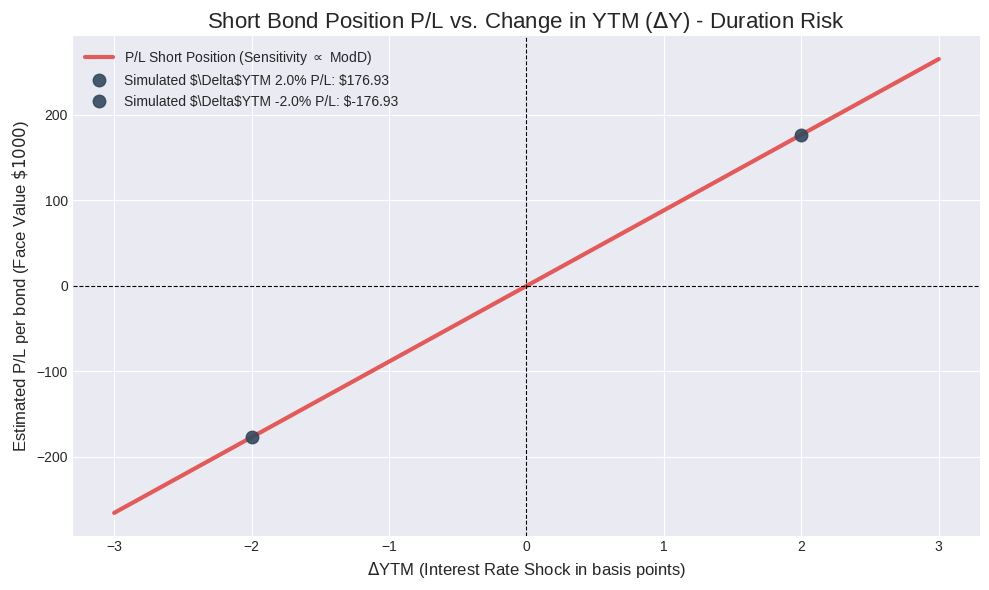

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# ----------------------------------------------------------------------
# 1. Duration and Price Sensitivity Functions
# ----------------------------------------------------------------------

def calculate_bond_price(cash_flows: np.ndarray, times: np.ndarray, ytm: float) -> Tuple[float, np.ndarray]:
    """
    Calculates the present value (price) of a bond and individual PVs.
    """
    rate_per_period = 1 + ytm
    # Ensure correct NumPy type for array division
    present_values = cash_flows / (rate_per_period ** times)
    return np.sum(present_values), present_values

def macaulay_duration(cash_flows: List[float], times: List[float], ytm: float) -> Tuple[float, float]:
    """
    Calculates the Macaulay Duration (MacD) of a bond.
    """
    cash_flows_array = np.array(cash_flows)
    times_array = np.array(times)

    # 1. Calculate Total Present Value (Bond Price) and individual PVs
    total_present_value, pv_array = calculate_bond_price(cash_flows_array, times_array, ytm)

    if total_present_value == 0:
        return 0.0, 0.0

    # 2. Calculate the weighted present value components (t_i * PV_i)
    weighted_pv_components = times_array * pv_array

    # 3. Calculate the sum of the weighted present value (Numerator)
    sum_weighted_pv = np.sum(weighted_pv_components)

    # 4. Calculate Macaulay Duration
    macd = sum_weighted_pv / total_present_value

    return macd, total_present_value

def modified_duration(macd: float, ytm: float) -> float:
    """
    Calculates the Modified Duration (ModD), which estimates price sensitivity.
    """
    if 1 + ytm == 0:
        return np.nan
    return macd / (1 + ytm)

def estimate_price_change_short(initial_price: float, modd: float, delta_ytm: float, num_bonds: int = 1) -> Tuple[float, float]:
    """
    Estimates the P/L for a SHORT position based on the duration rule.
    """
    # Percentage change in price: -ModD * Delta YTM
    price_change_ratio = -modd * delta_ytm

    # Absolute change in price
    delta_price = initial_price * price_change_ratio

    # Short Position P/L: P/L = -(Delta P) * Num Bonds
    short_position_pl = -delta_price * num_bonds

    # Calculate the new estimated price for context
    new_price = initial_price + delta_price

    return short_position_pl, new_price

# ----------------------------------------------------------------------
# 2. AI Assistance (Mock Neural Model for Volatility Assessment)
# ----------------------------------------------------------------------
class AIAssistanceModel:
    """
    A simple model that provides an automated assessment of duration risk
    based on the Modified Duration (ModD).
    """
    def __init__(self, modd: float):
        self.modd = modd

    def assess_volatility_exposure(self, delta_ytm: float) -> float:
        """Estimates the fractional price change based on ModD and YTM shock."""
        # P/P (price change ratio) = -ModD * Delta YTM
        return -self.modd * delta_ytm

    def provide_advice(self, initial_price: float, rate_shock: float):
        """Prints a contextual risk assessment."""
        pl_ratio = self.assess_volatility_exposure(rate_shock)

        print("\n--- AI ASSISTANCE: Duration Risk Assessment ---")
        print(rf"Model Input: ModD={self.modd:.2f}, Rate Shock={rate_shock*100:.1f}bp")

        # Threshold for 'High Risk' is set arbitrarily at 5% price movement
        if abs(pl_ratio) > 0.05:
            print(rf"**WARNING: HIGH VOLATILITY EXPOSURE.** The ModD implies a **{abs(pl_ratio)*100:.2f}%** price swing for this $\Delta$YTM.")
            if rate_shock > 0:
                print("Risk Advice: Rates rising is favorable for this short position, but be aware of significant loss potential if rates reverse.")
            else:
                print("Risk Advice: Rates falling poses a large, immediate loss. Suggest reducing position size or hedging with options/futures.")
        else:
            print(rf"MODERATE EXPOSURE. The position is relatively stable against this specific rate shock size.")
        print("-" * 70)


# ----------------------------------------------------------------------
# 3. Visualization Function
# ----------------------------------------------------------------------
def plot_risk_analysis(modd: float, initial_price: float, shock_points: List[float]):
    """
    Visualizes the linear relationship between P/L and YTM change.
    """
    # Create a range of YTM changes for the plot
    delta_ytms = np.linspace(min(shock_points) * 1.5, max(shock_points) * 1.5, 100)

    # P/L for Short Position is proportional to YTM change:
    # P/L (Short) = P * ModD * Delta YTM
    pl_short = initial_price * modd * delta_ytms

    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn-v0_8-darkgrid')

    # Plot the P/L function (linear dependency)
    plt.plot(delta_ytms * 100, pl_short, label=rf'P/L Short Position (Sensitivity $\propto$ ModD)', color='#E35A5A', linewidth=3)

    # Plot the two simulated points from the main block
    for shock in shock_points:
        pl_sim, _ = estimate_price_change_short(initial_price, modd, shock)
        plt.plot(shock * 100, pl_sim, 'o', color='#34495E', markersize=9,
                 label=rf'Simulated $\Delta$YTM {shock*100:.1f}% P/L: ${pl_sim:.2f}', alpha=0.9)

    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

    plt.title(r'Short Bond Position P/L vs. Change in YTM ($\Delta$Y) - Duration Risk', fontsize=16)
    plt.xlabel(r'$\Delta$YTM (Interest Rate Shock in basis points)', fontsize=12)
    plt.ylabel(r'Estimated P/L per bond (Face Value $\$1000$)', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ----------------------------------------------------------------------
# 4. Simulation Execution Block
# ----------------------------------------------------------------------
if __name__ == "__main__":

    # --- BOND PARAMETERS ---
    FACE_VALUE = 1000.0
    COUPON_RATE = 0.08    # 8% annual coupon
    MATURITY_YEARS = 10   # 10-year bond
    INITIAL_YTM = 0.05    # Initial Yield to Maturity (5%)

    # --- SCENARIO PARAMETERS (200 basis point shock) ---
    RATE_SHOCK_RISE = 0.02  # Interest Rates rise by 200 basis points (2.0%)
    RATE_SHOCK_FALL = -0.02 # Interest Rates fall by 200 basis points (-2.0%)

    # --- CONSTRUCT CASH FLOWS ---
    coupon_amount = FACE_VALUE * COUPON_RATE
    cash_flows = [coupon_amount] * (MATURITY_YEARS - 1) + [coupon_amount + FACE_VALUE]
    times = np.arange(1, MATURITY_YEARS + 1)

    # ------------------------------------------------------------------
    # A. Initial Calculation
    # ------------------------------------------------------------------
    macd, initial_price = macaulay_duration(cash_flows, times, INITIAL_YTM)
    modd = modified_duration(macd, INITIAL_YTM)

    print("=" * 70)
    print("--- BOND SHORTING & DURATION RISK SIMULATION ---")
    print("=" * 70)
    print(rf"Bond Parameters: {MATURITY_YEARS}-Year, {COUPON_RATE*100:.0f}% Coupon, Initial YTM: {INITIAL_YTM*100:.2f}%")
    print("-" * 70)

    print(rf"Initial Bond Price (V): ${initial_price:.2f}")
    print(rf"Macaulay Duration (MacD): {macd:.4f} years")
    print(rf"Modified Duration (ModD): {modd:.4f} (Price sensitivity metric)")

    print(rf"\nInterpretation:")
    print(rf"For every 1% (100 bp) change in YTM, the price is expected to change by approximately $\pm${modd*100:.2f}%.")
    print("-" * 70)

    # ------------------------------------------------------------------
    # B. AI Assistance and Simulation Runs
    # ------------------------------------------------------------------

    # Initialize AI Model with the calculated Modified Duration
    ai_model = AIAssistanceModel(modd=modd)

    # Run AI Assessment
    ai_model.provide_advice(initial_price, RATE_SHOCK_RISE)
    ai_model.provide_advice(initial_price, RATE_SHOCK_FALL)

    # Simulation 1: Rates Rise (Favorable for Short)
    pl_rise, new_price_rise = estimate_price_change_short(initial_price, modd, RATE_SHOCK_RISE)

    print("\n--- SIMULATION 1: INTEREST RATES RISE (YTM +2.0%) ---")
    print(rf"Change in YTM ($\Delta$Y): +{RATE_SHOCK_RISE*100:.1f}%")
    print(rf"Estimated New Price: ${new_price_rise:.2f}")
    print(rf"Profit / Loss (P/L) from Short Position: ${pl_rise:.2f}")

    # Simulation 2: Rates Fall (Unfavorable for Short)
    pl_fall, new_price_fall = estimate_price_change_short(initial_price, modd, RATE_SHOCK_FALL)

    print("\n--- SIMULATION 2: INTEREST RATES FALL (YTM -2.0%) ---")
    print(rf"Change in YTM ($\Delta$Y): {RATE_SHOCK_FALL*100:.1f}%")
    print(rf"Estimated New Price: ${new_price_fall:.2f}")
    print(rf"Profit / Loss (P/L) from Short Position: ${pl_fall:.2f}")
    print("=" * 70)

    # ------------------------------------------------------------------
    # C. Visualization
    # ------------------------------------------------------------------
    plot_risk_analysis(modd, initial_price, [RATE_SHOCK_RISE, RATE_SHOCK_FALL])
